The final notebook in the series focused on analyzing the results of extracting impact sentences using BART large MNLI specifically by checking if the assumed threshold is qualified or not. Different ways to visualize the reuslts are shown below, notably are the confusion matrices and the F1 score.

Please ensure to paste the input_path, which is the location of 0_input.ipynb file, at the start of this notebook. This step is the only requirement to load all necessary information for the execution of the code.

Recommended Google Colab Runtime Type: CPU, as this notebook does not involve running machine learning models.

In [1]:
# Input file path (must navigate at the beginning of each file)
input_path = "/content/drive/My Drive/ImpactDataMining/Turkiye_Earthquake/Result"

In [2]:
import os
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn

from google.colab import drive
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [3]:
import time

start_time = time.time()

In [4]:
def current_path():
  print("Current working directory")
  print(os.getcwd())
  print()

current_path()
drive.mount('/content/drive')
os.chdir(input_path)
current_path()

Current working directory
/content

Mounted at /content/drive
Current working directory
/content/drive/My Drive/ImpactDataMining/Turkiye_Earthquake/Result



In [5]:
with open('0_input.json', 'r') as file:
    data = json.load(file)
    result_path = data['result_path']
    keywords_non_impact = data['keywords_non_impact']

In [6]:
os.makedirs(result_path, exist_ok=True)
os.chdir(result_path)
current_path()

Current working directory
/content/drive/My Drive/ImpactDataMining/Turkiye_Earthquake/Result



In [7]:
with open('1_results.json', 'r') as file:
    data = json.load(file)
    idx_body = data['idx_body']
    idx_table = data['idx_table']

with open('2a_results.json', 'r') as file:
    data = json.load(file)
    sent_all = data['sent_all']
    keywords = data['labels']
    label_pred = data['result_probs']
    result_labels = data['result_labels']

with open('4_results.json', 'r') as file:
    data = json.load(file)
    s_struct = data['labeled_data_struct']
    s_comm = data['labeled_data_comm']
    s_n = data['labeled_data_n']

In [8]:
data_struct = s_struct + s_n
data_comm = s_comm + s_n
data_impact = s_struct + s_comm + s_n

In [9]:
for i, n in enumerate(result_labels):
  if n in keywords_non_impact:
    label_pred[i] = 0

In [10]:
y_true = [1 if n in data_impact else 0 for n in sent_all]
y_pred_6 = [1 if n >= .6 else 0 for n in label_pred]
y_pred_7 = [1 if n >= .7 else 0 for n in label_pred]
y_pred_8 = [1 if n >= .8 else 0 for n in label_pred]
y_pred_9 = [1 if n >= .9 else 0 for n in label_pred]

In [11]:
true_positives = [i for i, (x, y) in enumerate(zip(y_true, y_pred_9)) if x == 1 and y == 1]
true_negatives = [i for i, (x, y) in enumerate(zip(y_true, y_pred_9)) if x == 0 and y == 0]
false_negatives = [i for i, (x, y) in enumerate(zip(y_true, y_pred_9)) if x == 1 and y == 0]
false_positives = [i for i, (x, y) in enumerate(zip(y_true, y_pred_9)) if x == 0 and y == 1]

In [12]:
def result_analysis(y_true, y_pred):
    acc = accuracy_score(y_true, y_pred)
    pre = precision_score(y_true, y_pred)
    rec = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)

    print("Accuracy:", acc)
    print("Precision:", pre)
    print("Recall:", rec)
    print("F1 Score: ", f1)

    confusion_mat = confusion_matrix(y_true, y_pred)
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
    confusion_mat_para = [tn, fp, fn, tp]

    print("True negatives:", tn)
    print("False positives:", fp)
    print("False negatives:", fn)
    print("True positives:", tp)

    display_labels = ['0', '1']

    # Adjusting font sizes
    fig, ax = plt.subplots(figsize=(6, 6))  # Adjust the size of the figure

    disp = ConfusionMatrixDisplay(confusion_matrix=confusion_mat, display_labels=display_labels)
    disp.plot(cmap=plt.cm.Blues, ax=ax, values_format='d', colorbar=False) # Add colorbar=False here

    # Increase font size of labels, titles, and ticks
    plt.xlabel('Predicted Label', fontsize=15)
    plt.ylabel('True Label', fontsize=15)
    plt.xticks(fontsize=15)
    plt.yticks(fontsize=15)

    # Increase font size of numbers inside the confusion matrix
    for text in ax.texts:
        text.set_size(15)

    # Increase font size of the colorbar labels
    cbar = plt.gcf().colorbar(ax.images[0], ax=ax)
    cbar.ax.tick_params(labelsize=10)

    return acc, pre, rec, f1, confusion_mat_para


In [13]:
# false_positives, result_labels, label_pred
def display_result(data, idx, result_labels, prob):
  sentences = [data[i] for i in idx]
  labels = [result_labels[i] for i in idx]
  probability = [prob[i] for i in idx]
  data = {'Sentences': sentences, 'Labels': labels, 'Probability': probability}
  df = pd.DataFrame(data)
  return df

In [14]:
print('Sentences with False Positive label')
df_false_positive = display_result(sent_all, false_positives, result_labels, label_pred)
df_false_positive

Sentences with False Positive label


,Sentences,Labels,Probability
0,This earthquake was followed by many aftershoc...,building resilience,0.970958
1,"In Türkiye alone, more than 100,000 people wer...",injuries,0.991831
2,The objectives of this joint Preliminary Virtu...,economic loss,0.981395
3,Members of the Turkish business sector have pr...,building resilience,0.918475
4,"Civil society, non-governmental organizations,...",good performance,0.927107
...,...,...,...
97,"Bulam 3 bridge - collapsed, 3 spans, - 55.3 m ...",bridge damage,0.999138
98,"Balikburnu bridge collapsed, single span, 14.2...",bridge damage,0.998298
99,Highly vulnerable structures with severe damag...,fatalities,0.990270
100,Availability/interest of members in the impact...,building resilience,0.918726


In [15]:
# print('Sentences with False Negative label')
df_false_negative = display_result(sent_all, false_negatives, result_labels, label_pred)
df_false_negative

,Sentences,Labels,Probability
0,The USGS PAGER (Prompt Assessment of Global Ea...,ground motion intensity,0.000000
1,"From this information, it was estimated that a...",frame damage,0.317168
2,Note that this does not include the cascading ...,insufficient confinement,0.863115
3,"A fire occurred at one of these ports, Türkiye...",port damage,0.798393
4,"For example, the earthquake sequence has affec...",critical facility damage,0.860330
5,Iskenderun is an important port in Türkiye for...,building resilience,0.878837
6,Roughly 80% of these mills are long steel prod...,critical facility damage,0.894257
7,Since the Mw 7.8 earthquake occurred at 4:17 a...,ground motion intensity,0.000000
8,Since these numbers are provided by the offici...,economic loss,0.798428
9,"However, when the shaking experienced signific...",structural damage,0.816819


Accuracy: 0.7046979865771812
Precision: 0.667741935483871
Recall: 0.9672897196261683
F1 Score:  0.7900763358778626
True negatives: 111
False positives: 206
False negatives: 14
True positives: 414


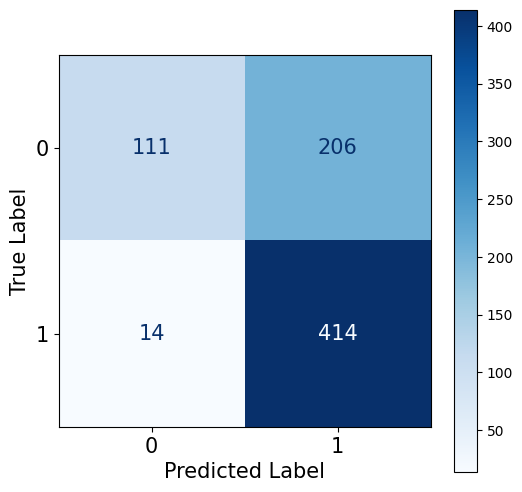

In [16]:
acc_6, pre_6, rec_6, f1_6, confusion_mat_para_6 = result_analysis(y_true, y_pred_6)

Accuracy: 0.7315436241610739
Precision: 0.6906354515050167
Recall: 0.9649532710280374
F1 Score:  0.8050682261208577
True negatives: 132
False positives: 185
False negatives: 15
True positives: 413


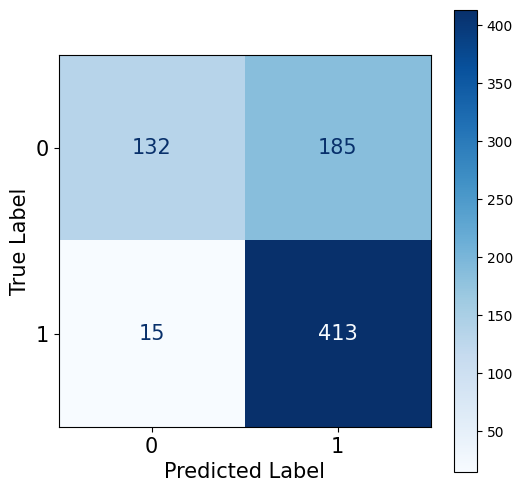

In [17]:
acc_7, pre_7, rec_7, f1_7, confusion_mat_para_7 = result_analysis(y_true, y_pred_7)

Accuracy: 0.7785234899328859
Precision: 0.736936936936937
Recall: 0.955607476635514
F1 Score:  0.832146490335707
True negatives: 171
False positives: 146
False negatives: 19
True positives: 409


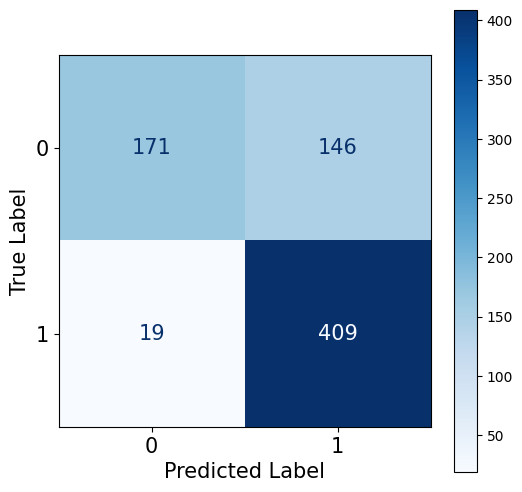

In [18]:
acc_8, pre_8, rec_8, f1_8, confusion_mat_para_8 = result_analysis(y_true, y_pred_8)

Accuracy: 0.810738255033557
Precision: 0.7922606924643585
Recall: 0.9088785046728972
F1 Score:  0.8465723612622414
True negatives: 215
False positives: 102
False negatives: 39
True positives: 389


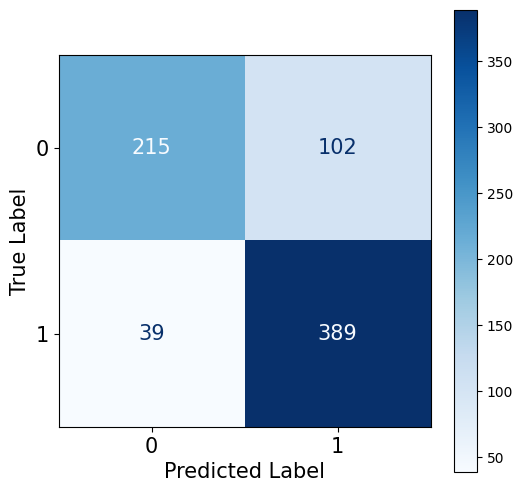

In [19]:
acc_9, pre_9, rec_9, f1_9, confusion_mat_para_9 = result_analysis(y_true, y_pred_9)

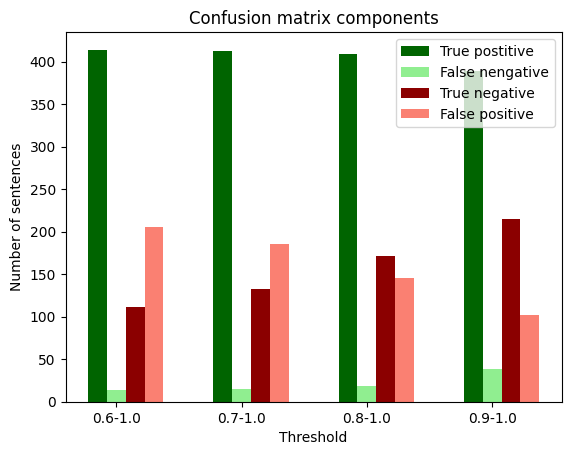

In [20]:
# Create data for each bar chart
data_all = confusion_mat_para_6+confusion_mat_para_7+confusion_mat_para_8+confusion_mat_para_9
tn = data_all[0::4]
fp = data_all[1::4]
fn = data_all[2::4]
tp = data_all[3::4]

# Set the positions of the bars on the x-axis
x = range(len(tn))

# Set the width of each bar
width = 0.15

# Create the figure and axis objects
fig, ax = plt.subplots()

# Plot the bar charts
ax.bar(x, tp, width=width, color='darkgreen', label='True postitive')
ax.bar([val + width for val in x], fn, width=width, color='lightgreen', label='False nengative')
ax.bar([val + width*2 for val in x], tn, width=width, color='darkred', label='True negative')
ax.bar([val + width*3 for val in x], fp, width=width, color='salmon', label='False positive')

# Set the y-axis limits
# ax.set_ylim([0, 350])

# Set the x-axis tick positions and labels
ax.set_xticks([val + width for val in x])
ax.set_xticklabels(['0.6-1.0', '0.7-1.0', '0.8-1.0', '0.9-1.0'])

# Set the title and labels
ax.set_title('Confusion matrix components')
ax.set_xlabel('Threshold')
ax.set_ylabel('Number of sentences')

# Add a legend
ax.legend()

# Show the plot
plt.show()

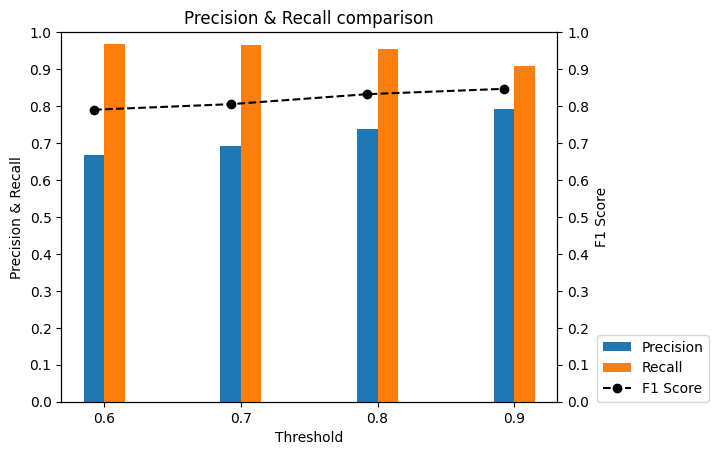

In [21]:
# Create data for each bar chart
acc = [acc_6, acc_7, acc_8, acc_9]
pre = [pre_6, pre_7, pre_8, pre_9]
rec = [rec_6, rec_7, rec_8, rec_9]

F1 = [f1_6, f1_7, f1_8, f1_9]

# Set the positions of the bars on the x-axis
x = range(len(pre))

# Set the width of each bar
width = 0.15

# Create the figure and axis objects
fig, ax1 = plt.subplots()

# Plot the bar charts
ax1.bar(x, pre, width=width, label='Precision')
ax1.bar([val + width for val in x], rec, width=width, label='Recall')

# Adjust the x-tick positions to be at the center between the bars
tick_positions = [val + width/2 for val in x]

# Set the x-axis tick positions and labels
ax1.set_xticks(tick_positions)
ax1.set_xticklabels(['0.6', '0.7', '0.8', '0.9'])

# Create a second y-axis
ax2 = ax1.twinx()

# Line chart related to the right y-axis
ax2.plot(x, F1, color='k', marker='o', linestyle='--', label='F1 Score')

# Set the y-axis limits
ax1.set_ylim([0, 1])
ax1.set_yticks(np.arange(0, 1.1, 0.1))  # Set y-ticks for ax1
ax1.tick_params(axis='y')  # Adjust y-tick font size for ax1

ax2.set_ylim([0, 1])
ax2.set_yticks(np.arange(0, 1.1, 0.1))  # Set y-ticks for ax2
ax2.tick_params(axis='y')  # Adjust y-tick font size for ax2

# Set the title and labels
ax1.set_title('Precision & Recall comparison')
ax1.set_xlabel('Threshold')
ax1.set_ylabel('Precision & Recall')
ax2.set_ylabel('F1 Score')

# Get the handles and labels from ax1 and ax2
handles, labels = ax1.get_legend_handles_labels()
handles2, labels2 = ax2.get_legend_handles_labels()

# Combine handles and labels
handles += handles2
labels += labels2

# Create a single legend for both ax1 and ax2
plt.legend(handles, labels, bbox_to_anchor=(1.32, 0.2))

# Set the title
ax1.set_title('Precision & Recall comparison')

# Set the x-axis label
ax1.set_xlabel('Threshold')

# Set the y-axis labels
ax1.set_ylabel('Precision & Recall')
ax2.set_ylabel('F1 Score')

# Show the plot
plt.show()

In [22]:
table = {'Threshold': ['0.6-1.0', '0.7-1.0', '0.8-1.0', '0.9-1.0'],
         'Accuracy': acc,
         'Precision': pre,
         'Recall': rec,
         'F1 Score': F1}
df = pd.DataFrame(table)
df

,Threshold,Accuracy,Precision,Recall,F1 Score
0,0.6-1.0,0.704698,0.667742,0.967290,0.790076
1,0.7-1.0,0.731544,0.690635,0.964953,0.805068
2,0.8-1.0,0.778523,0.736937,0.955607,0.832146
3,0.9-1.0,0.810738,0.792261,0.908879,0.846572


In [23]:
df.to_excel('5_F1score.xlsx', index=False)

In [24]:
end_time = time.time()
execution_time = end_time - start_time

print("Execution time:", execution_time, "seconds")

Execution time: 25.040926218032837 seconds
